# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

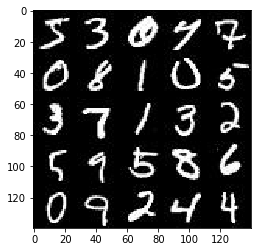

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

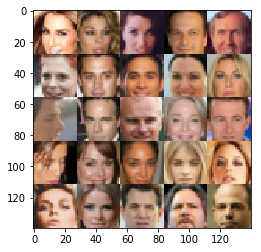

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\geesi\Anaconda3\envs\dlnd\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='input_z')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 3, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 3, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 3, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 3, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
print_every=10
show_every=100

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learning_r = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers                
                _ = sess.run([g_train_opt, d_train_opt], feed_dict={input_real: batch_images, input_z: batch_z, learning_r: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out 
                    train_loss_g, train_loss_d = sess.run([g_loss, d_loss], feed_dict={input_z: batch_z, input_real: batch_images})                   

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 36, input_z, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1656... Generator Loss: 9.5054
Epoch 1/2... Discriminator Loss: 0.3246... Generator Loss: 2.0574
Epoch 1/2... Discriminator Loss: 0.2368... Generator Loss: 2.1233
Epoch 1/2... Discriminator Loss: 4.1600... Generator Loss: 0.2219
Epoch 1/2... Discriminator Loss: 1.3071... Generator Loss: 0.4172
Epoch 1/2... Discriminator Loss: 4.3705... Generator Loss: 9.6662
Epoch 1/2... Discriminator Loss: 3.6717... Generator Loss: 6.3033
Epoch 1/2... Discriminator Loss: 0.0863... Generator Loss: 3.2736
Epoch 1/2... Discriminator Loss: 0.0633... Generator Loss: 3.4531
Epoch 1/2... Discriminator Loss: 0.0239... Generator Loss: 4.3806


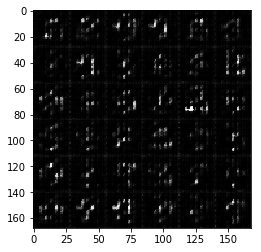

Epoch 1/2... Discriminator Loss: 0.0116... Generator Loss: 5.2000
Epoch 1/2... Discriminator Loss: 0.0506... Generator Loss: 4.2490
Epoch 1/2... Discriminator Loss: 2.0228... Generator Loss: 1.1128
Epoch 1/2... Discriminator Loss: 0.5692... Generator Loss: 1.2633
Epoch 1/2... Discriminator Loss: 0.3270... Generator Loss: 1.6815
Epoch 1/2... Discriminator Loss: 0.5913... Generator Loss: 1.1875
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 6.3960
Epoch 1/2... Discriminator Loss: 0.1820... Generator Loss: 2.7533
Epoch 1/2... Discriminator Loss: 0.4095... Generator Loss: 3.5751
Epoch 1/2... Discriminator Loss: 0.2315... Generator Loss: 2.6840


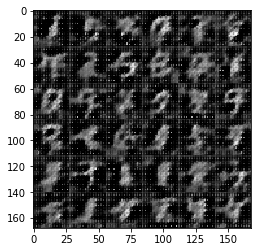

Epoch 1/2... Discriminator Loss: 0.7055... Generator Loss: 6.6684
Epoch 1/2... Discriminator Loss: 0.2145... Generator Loss: 2.3858
Epoch 1/2... Discriminator Loss: 0.3441... Generator Loss: 2.4183
Epoch 1/2... Discriminator Loss: 0.1141... Generator Loss: 3.6674
Epoch 1/2... Discriminator Loss: 3.3843... Generator Loss: 0.0628
Epoch 1/2... Discriminator Loss: 0.6705... Generator Loss: 1.4304
Epoch 1/2... Discriminator Loss: 1.1376... Generator Loss: 0.8542
Epoch 1/2... Discriminator Loss: 1.0528... Generator Loss: 1.4276
Epoch 1/2... Discriminator Loss: 0.4171... Generator Loss: 2.4897
Epoch 1/2... Discriminator Loss: 0.2450... Generator Loss: 4.1646


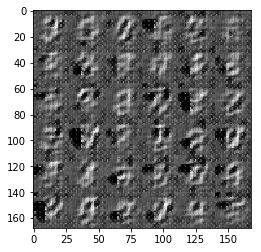

Epoch 1/2... Discriminator Loss: 0.0360... Generator Loss: 6.0224
Epoch 1/2... Discriminator Loss: 0.0384... Generator Loss: 5.1514
Epoch 1/2... Discriminator Loss: 0.6916... Generator Loss: 6.9119
Epoch 1/2... Discriminator Loss: 0.8278... Generator Loss: 0.9595
Epoch 1/2... Discriminator Loss: 2.3836... Generator Loss: 5.7554
Epoch 1/2... Discriminator Loss: 0.8692... Generator Loss: 1.6411
Epoch 1/2... Discriminator Loss: 0.4594... Generator Loss: 1.7839
Epoch 1/2... Discriminator Loss: 0.8498... Generator Loss: 3.1567
Epoch 1/2... Discriminator Loss: 0.9492... Generator Loss: 0.8875
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 4.2797


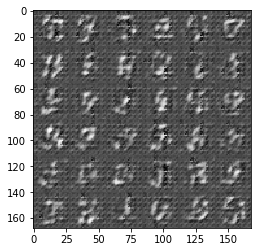

Epoch 1/2... Discriminator Loss: 0.9230... Generator Loss: 0.7012
Epoch 1/2... Discriminator Loss: 0.4760... Generator Loss: 1.4614
Epoch 1/2... Discriminator Loss: 0.4343... Generator Loss: 1.5821
Epoch 1/2... Discriminator Loss: 0.3738... Generator Loss: 2.2256
Epoch 1/2... Discriminator Loss: 2.5596... Generator Loss: 0.1080
Epoch 1/2... Discriminator Loss: 0.6972... Generator Loss: 1.5691
Epoch 1/2... Discriminator Loss: 0.9448... Generator Loss: 1.0634
Epoch 1/2... Discriminator Loss: 0.5044... Generator Loss: 1.2189
Epoch 1/2... Discriminator Loss: 0.5325... Generator Loss: 2.2472
Epoch 1/2... Discriminator Loss: 0.3615... Generator Loss: 2.3050


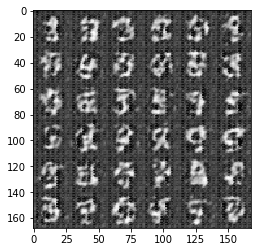

Epoch 1/2... Discriminator Loss: 0.6649... Generator Loss: 0.9279
Epoch 1/2... Discriminator Loss: 0.0608... Generator Loss: 3.2549
Epoch 1/2... Discriminator Loss: 0.0990... Generator Loss: 2.8226
Epoch 1/2... Discriminator Loss: 3.7295... Generator Loss: 0.0446
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 3.5166
Epoch 1/2... Discriminator Loss: 0.8024... Generator Loss: 6.2382
Epoch 1/2... Discriminator Loss: 0.4880... Generator Loss: 1.3804
Epoch 1/2... Discriminator Loss: 0.7418... Generator Loss: 0.8834
Epoch 1/2... Discriminator Loss: 0.0816... Generator Loss: 5.2948
Epoch 1/2... Discriminator Loss: 0.3486... Generator Loss: 1.3646


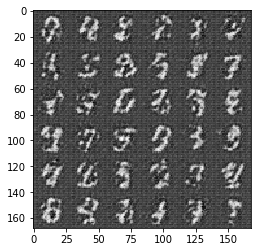

Epoch 2/2... Discriminator Loss: 0.4587... Generator Loss: 5.6957
Epoch 2/2... Discriminator Loss: 0.2358... Generator Loss: 2.1781
Epoch 2/2... Discriminator Loss: 1.0182... Generator Loss: 2.4729
Epoch 2/2... Discriminator Loss: 1.4092... Generator Loss: 4.8116
Epoch 2/2... Discriminator Loss: 1.0439... Generator Loss: 0.5810
Epoch 2/2... Discriminator Loss: 0.4391... Generator Loss: 1.2782
Epoch 2/2... Discriminator Loss: 0.7686... Generator Loss: 6.4616
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 0.9509
Epoch 2/2... Discriminator Loss: 6.0668... Generator Loss: 4.3508
Epoch 2/2... Discriminator Loss: 2.1806... Generator Loss: 2.3603


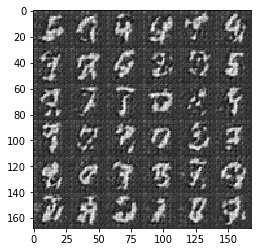

Epoch 2/2... Discriminator Loss: 0.2179... Generator Loss: 4.5210
Epoch 2/2... Discriminator Loss: 0.6793... Generator Loss: 0.9406
Epoch 2/2... Discriminator Loss: 0.1855... Generator Loss: 2.7749
Epoch 2/2... Discriminator Loss: 0.6183... Generator Loss: 2.3654
Epoch 2/2... Discriminator Loss: 0.4553... Generator Loss: 4.7797
Epoch 2/2... Discriminator Loss: 0.4336... Generator Loss: 1.5978
Epoch 2/2... Discriminator Loss: 0.7546... Generator Loss: 0.7620
Epoch 2/2... Discriminator Loss: 0.5634... Generator Loss: 2.2275
Epoch 2/2... Discriminator Loss: 0.4663... Generator Loss: 1.4776
Epoch 2/2... Discriminator Loss: 1.3233... Generator Loss: 0.4200


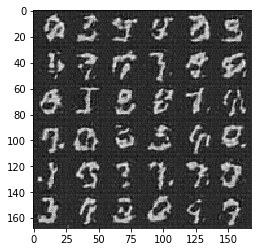

Epoch 2/2... Discriminator Loss: 3.4594... Generator Loss: 0.0561
Epoch 2/2... Discriminator Loss: 0.5000... Generator Loss: 1.3602
Epoch 2/2... Discriminator Loss: 0.5530... Generator Loss: 1.1150
Epoch 2/2... Discriminator Loss: 0.7517... Generator Loss: 0.8875
Epoch 2/2... Discriminator Loss: 0.3551... Generator Loss: 1.5750
Epoch 2/2... Discriminator Loss: 0.6053... Generator Loss: 1.1762
Epoch 2/2... Discriminator Loss: 0.2328... Generator Loss: 2.2940
Epoch 2/2... Discriminator Loss: 0.4957... Generator Loss: 1.4184
Epoch 2/2... Discriminator Loss: 0.1371... Generator Loss: 2.8276
Epoch 2/2... Discriminator Loss: 2.1838... Generator Loss: 10.7419


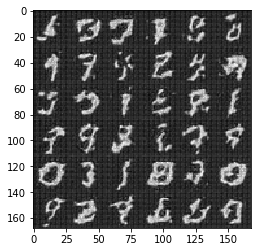

Epoch 2/2... Discriminator Loss: 0.5388... Generator Loss: 2.3131
Epoch 2/2... Discriminator Loss: 0.1658... Generator Loss: 3.1047
Epoch 2/2... Discriminator Loss: 0.1587... Generator Loss: 2.6141
Epoch 2/2... Discriminator Loss: 0.6081... Generator Loss: 1.1027
Epoch 2/2... Discriminator Loss: 0.1136... Generator Loss: 5.1983
Epoch 2/2... Discriminator Loss: 0.1983... Generator Loss: 2.9133
Epoch 2/2... Discriminator Loss: 0.2195... Generator Loss: 2.0952
Epoch 2/2... Discriminator Loss: 0.0449... Generator Loss: 4.6304
Epoch 2/2... Discriminator Loss: 0.0984... Generator Loss: 3.1003
Epoch 2/2... Discriminator Loss: 0.4073... Generator Loss: 1.3535


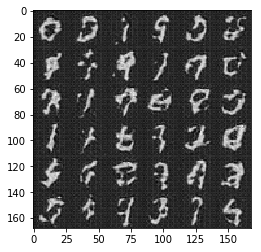

Epoch 2/2... Discriminator Loss: 0.9089... Generator Loss: 6.4201
Epoch 2/2... Discriminator Loss: 0.3827... Generator Loss: 1.5179
Epoch 2/2... Discriminator Loss: 0.4772... Generator Loss: 1.8966
Epoch 2/2... Discriminator Loss: 2.3571... Generator Loss: 0.2211
Epoch 2/2... Discriminator Loss: 1.1277... Generator Loss: 0.6217
Epoch 2/2... Discriminator Loss: 0.7227... Generator Loss: 1.2294
Epoch 2/2... Discriminator Loss: 0.4592... Generator Loss: 1.6435
Epoch 2/2... Discriminator Loss: 2.1859... Generator Loss: 5.0962
Epoch 2/2... Discriminator Loss: 0.5194... Generator Loss: 2.2588
Epoch 2/2... Discriminator Loss: 0.4272... Generator Loss: 2.8432


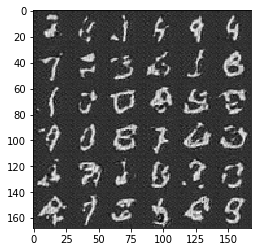

Epoch 2/2... Discriminator Loss: 0.4386... Generator Loss: 1.8269
Epoch 2/2... Discriminator Loss: 0.5545... Generator Loss: 1.0985
Epoch 2/2... Discriminator Loss: 0.3642... Generator Loss: 1.5382
Epoch 2/2... Discriminator Loss: 0.2624... Generator Loss: 1.8566
Epoch 2/2... Discriminator Loss: 4.3319... Generator Loss: 8.9533
Epoch 2/2... Discriminator Loss: 0.6659... Generator Loss: 2.6113
Epoch 2/2... Discriminator Loss: 0.4933... Generator Loss: 1.9233
Epoch 2/2... Discriminator Loss: 0.5768... Generator Loss: 1.2121
Epoch 2/2... Discriminator Loss: 0.6027... Generator Loss: 1.7325
Epoch 2/2... Discriminator Loss: 0.3268... Generator Loss: 1.8459


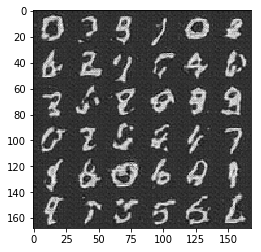

In [12]:
batch_size = 100
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.5730
Epoch 1/1... Discriminator Loss: 0.6474... Generator Loss: 1.1129
Epoch 1/1... Discriminator Loss: 0.4515... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 1.6815
Epoch 1/1... Discriminator Loss: 0.5463... Generator Loss: 1.3975
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 0.3087... Generator Loss: 2.3209
Epoch 1/1... Discriminator Loss: 0.2980... Generator Loss: 2.2812
Epoch 1/1... Discriminator Loss: 0.2876... Generator Loss: 1.9869
Epoch 1/1... Discriminator Loss: 0.1182... Generator Loss: 2.8196


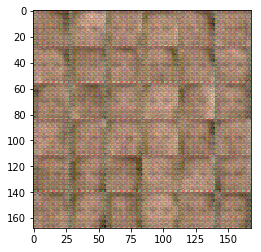

Epoch 1/1... Discriminator Loss: 0.2053... Generator Loss: 2.1932
Epoch 1/1... Discriminator Loss: 0.1575... Generator Loss: 2.5689
Epoch 1/1... Discriminator Loss: 0.1356... Generator Loss: 2.7059
Epoch 1/1... Discriminator Loss: 0.3124... Generator Loss: 2.4048
Epoch 1/1... Discriminator Loss: 0.2445... Generator Loss: 2.1643
Epoch 1/1... Discriminator Loss: 0.2620... Generator Loss: 2.8142
Epoch 1/1... Discriminator Loss: 0.3969... Generator Loss: 9.3853
Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 2.6749
Epoch 1/1... Discriminator Loss: 2.3271... Generator Loss: 9.4990
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 3.2131


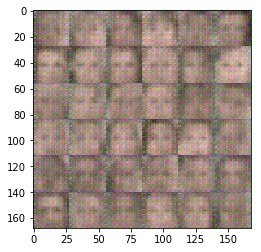

Epoch 1/1... Discriminator Loss: 0.4883... Generator Loss: 3.0323
Epoch 1/1... Discriminator Loss: 0.2597... Generator Loss: 5.9660
Epoch 1/1... Discriminator Loss: 1.9097... Generator Loss: 0.2182
Epoch 1/1... Discriminator Loss: 0.9957... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 0.7275... Generator Loss: 1.1469
Epoch 1/1... Discriminator Loss: 0.2728... Generator Loss: 2.4784
Epoch 1/1... Discriminator Loss: 1.6188... Generator Loss: 0.2944
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 1.2005
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 0.3246


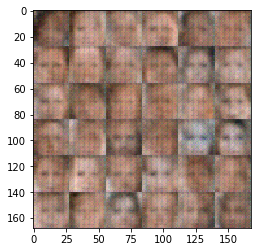

Epoch 1/1... Discriminator Loss: 0.7969... Generator Loss: 1.3149
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 1.2324
Epoch 1/1... Discriminator Loss: 0.9606... Generator Loss: 0.8835
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 1.1915
Epoch 1/1... Discriminator Loss: 0.4912... Generator Loss: 1.5323
Epoch 1/1... Discriminator Loss: 0.4539... Generator Loss: 1.9996
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 2.6681
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.7390
Epoch 1/1... Discriminator Loss: 0.7322... Generator Loss: 1.8999
Epoch 1/1... Discriminator Loss: 0.7770... Generator Loss: 1.2808


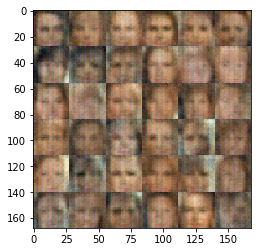

Epoch 1/1... Discriminator Loss: 1.7501... Generator Loss: 0.2432
Epoch 1/1... Discriminator Loss: 0.5182... Generator Loss: 1.3490
Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 3.6749
Epoch 1/1... Discriminator Loss: 1.6642... Generator Loss: 0.2998
Epoch 1/1... Discriminator Loss: 0.4608... Generator Loss: 1.6546
Epoch 1/1... Discriminator Loss: 1.6143... Generator Loss: 0.2948
Epoch 1/1... Discriminator Loss: 0.5677... Generator Loss: 1.5903
Epoch 1/1... Discriminator Loss: 0.2111... Generator Loss: 2.3698
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 3.0637
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 4.7830


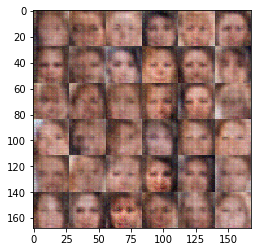

Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.3672
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 2.9076
Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 0.7644
Epoch 1/1... Discriminator Loss: 0.3035... Generator Loss: 3.7591
Epoch 1/1... Discriminator Loss: 0.4002... Generator Loss: 3.1519
Epoch 1/1... Discriminator Loss: 2.1731... Generator Loss: 0.1612
Epoch 1/1... Discriminator Loss: 0.7121... Generator Loss: 1.2214
Epoch 1/1... Discriminator Loss: 0.2930... Generator Loss: 1.9489
Epoch 1/1... Discriminator Loss: 1.6396... Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 1.4361


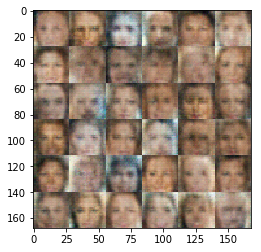

Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.4654
Epoch 1/1... Discriminator Loss: 0.2108... Generator Loss: 3.6853
Epoch 1/1... Discriminator Loss: 0.1985... Generator Loss: 2.7855
Epoch 1/1... Discriminator Loss: 0.4457... Generator Loss: 2.1854
Epoch 1/1... Discriminator Loss: 1.7639... Generator Loss: 0.2580
Epoch 1/1... Discriminator Loss: 0.7884... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 0.5137... Generator Loss: 3.1696
Epoch 1/1... Discriminator Loss: 0.3464... Generator Loss: 3.6414


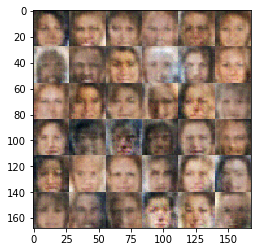

Epoch 1/1... Discriminator Loss: 0.1737... Generator Loss: 4.3869
Epoch 1/1... Discriminator Loss: 2.0936... Generator Loss: 0.1693
Epoch 1/1... Discriminator Loss: 0.4847... Generator Loss: 2.9468
Epoch 1/1... Discriminator Loss: 0.6084... Generator Loss: 0.9734
Epoch 1/1... Discriminator Loss: 0.6688... Generator Loss: 2.4374
Epoch 1/1... Discriminator Loss: 0.0990... Generator Loss: 4.1584
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 0.2579... Generator Loss: 5.0640
Epoch 1/1... Discriminator Loss: 0.7084... Generator Loss: 1.8188


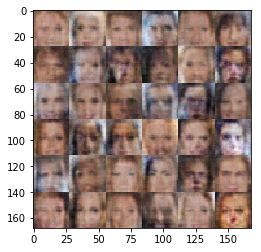

Epoch 1/1... Discriminator Loss: 0.0640... Generator Loss: 3.8279
Epoch 1/1... Discriminator Loss: 0.0652... Generator Loss: 5.5785
Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.4076
Epoch 1/1... Discriminator Loss: 0.2379... Generator Loss: 2.1763
Epoch 1/1... Discriminator Loss: 0.1277... Generator Loss: 5.2210
Epoch 1/1... Discriminator Loss: 1.5552... Generator Loss: 0.3038
Epoch 1/1... Discriminator Loss: 0.8695... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 0.2651... Generator Loss: 2.0343
Epoch 1/1... Discriminator Loss: 0.1332... Generator Loss: 6.5977
Epoch 1/1... Discriminator Loss: 0.2274... Generator Loss: 1.9859


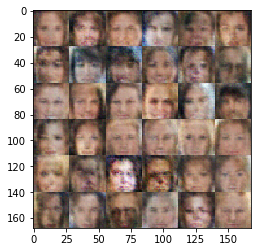

Epoch 1/1... Discriminator Loss: 0.2263... Generator Loss: 2.9637
Epoch 1/1... Discriminator Loss: 0.5101... Generator Loss: 1.1759
Epoch 1/1... Discriminator Loss: 0.0773... Generator Loss: 8.1798
Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 6.1140
Epoch 1/1... Discriminator Loss: 0.3720... Generator Loss: 1.5652
Epoch 1/1... Discriminator Loss: 0.0398... Generator Loss: 9.8744
Epoch 1/1... Discriminator Loss: 0.3234... Generator Loss: 4.0879
Epoch 1/1... Discriminator Loss: 0.2126... Generator Loss: 3.0329
Epoch 1/1... Discriminator Loss: 0.0310... Generator Loss: 7.8656


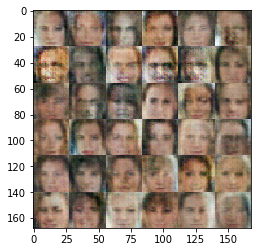

Epoch 1/1... Discriminator Loss: 0.3998... Generator Loss: 7.7778
Epoch 1/1... Discriminator Loss: 0.0777... Generator Loss: 8.0755
Epoch 1/1... Discriminator Loss: 0.6140... Generator Loss: 5.4973
Epoch 1/1... Discriminator Loss: 0.0210... Generator Loss: 8.6653
Epoch 1/1... Discriminator Loss: 0.1336... Generator Loss: 6.3775
Epoch 1/1... Discriminator Loss: 0.0477... Generator Loss: 6.3553
Epoch 1/1... Discriminator Loss: 2.3467... Generator Loss: 0.1267
Epoch 1/1... Discriminator Loss: 0.6188... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.9546... Generator Loss: 4.9944
Epoch 1/1... Discriminator Loss: 1.0913... Generator Loss: 0.4896


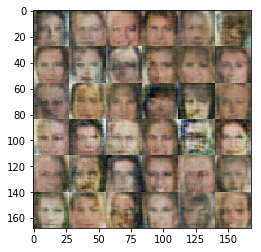

Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 7.5464
Epoch 1/1... Discriminator Loss: 1.6306... Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 0.0373... Generator Loss: 4.0886
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 10.9414
Epoch 1/1... Discriminator Loss: 0.1224... Generator Loss: 4.6391
Epoch 1/1... Discriminator Loss: 0.0351... Generator Loss: 9.8361
Epoch 1/1... Discriminator Loss: 0.0314... Generator Loss: 10.4118
Epoch 1/1... Discriminator Loss: 0.3298... Generator Loss: 4.1449
Epoch 1/1... Discriminator Loss: 0.0540... Generator Loss: 3.8802
Epoch 1/1... Discriminator Loss: 0.1442... Generator Loss: 7.1069


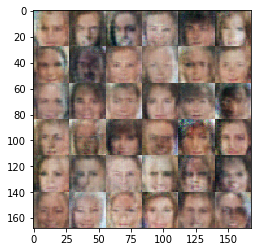

Epoch 1/1... Discriminator Loss: 0.0102... Generator Loss: 8.6324
Epoch 1/1... Discriminator Loss: 0.0300... Generator Loss: 9.8827
Epoch 1/1... Discriminator Loss: 0.3854... Generator Loss: 10.5262
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.3190
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 8.5100
Epoch 1/1... Discriminator Loss: 0.1003... Generator Loss: 3.4006
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.3037
Epoch 1/1... Discriminator Loss: 2.1328... Generator Loss: 0.1582
Epoch 1/1... Discriminator Loss: 0.2595... Generator Loss: 10.0904
Epoch 1/1... Discriminator Loss: 0.1162... Generator Loss: 9.7212


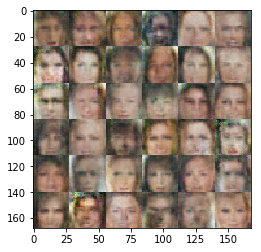

Epoch 1/1... Discriminator Loss: 0.2721... Generator Loss: 2.3472
Epoch 1/1... Discriminator Loss: 0.0568... Generator Loss: 5.6598
Epoch 1/1... Discriminator Loss: 0.1986... Generator Loss: 3.7458
Epoch 1/1... Discriminator Loss: 0.0755... Generator Loss: 4.8539
Epoch 1/1... Discriminator Loss: 0.1603... Generator Loss: 2.4541
Epoch 1/1... Discriminator Loss: 0.0706... Generator Loss: 5.1469
Epoch 1/1... Discriminator Loss: 0.0578... Generator Loss: 5.6016
Epoch 1/1... Discriminator Loss: 0.9937... Generator Loss: 7.4074
Epoch 1/1... Discriminator Loss: 0.1617... Generator Loss: 2.5914
Epoch 1/1... Discriminator Loss: 0.0383... Generator Loss: 6.5341


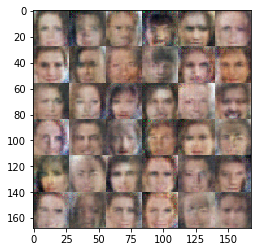

Epoch 1/1... Discriminator Loss: 0.0178... Generator Loss: 7.5187
Epoch 1/1... Discriminator Loss: 0.0315... Generator Loss: 9.2694
Epoch 1/1... Discriminator Loss: 0.0593... Generator Loss: 4.6352
Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 4.0876
Epoch 1/1... Discriminator Loss: 0.1719... Generator Loss: 3.1428
Epoch 1/1... Discriminator Loss: 0.2637... Generator Loss: 6.9014
Epoch 1/1... Discriminator Loss: 0.0297... Generator Loss: 10.5326
Epoch 1/1... Discriminator Loss: 0.5097... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 9.2157
Epoch 1/1... Discriminator Loss: 0.2947... Generator Loss: 4.3618


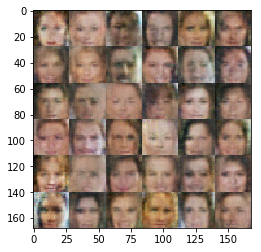

Epoch 1/1... Discriminator Loss: 0.0554... Generator Loss: 12.4389
Epoch 1/1... Discriminator Loss: 0.1656... Generator Loss: 2.5286
Epoch 1/1... Discriminator Loss: 0.0423... Generator Loss: 7.9993
Epoch 1/1... Discriminator Loss: 0.1038... Generator Loss: 6.5971
Epoch 1/1... Discriminator Loss: 0.0542... Generator Loss: 3.7276
Epoch 1/1... Discriminator Loss: 0.1181... Generator Loss: 5.7267
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 0.0787... Generator Loss: 6.2202


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.